#Лабораторная работа 1. Типовые нелинейности

##Цель работы

Знакомство с типовыми нелинейными звеньями

## Задачи работы

Изучение нелинейностей типа: реле (знак), насыщение, мертвая зона; построение статической характеристики; спектров исходного, преобразованного и фильтрованного сигналов, знакомство с экосистемой математических вычислений и моделирования SciPy (Python)


MatLab/Simulink является проприетарным дорогостоящим и достаточно объемным математическим пакетом, что влечет как преимущества в виде качества реализации в плане точности и удобства использования, так и недостатки вследствие длительного монопольного положения на рынке средств численных расчетов: существенные системные требования, высокую стоимость и невозможность оперативной установки на рабочий компьютер (время установки от 1 часа).

Основанная на Python экосистема (как называют ее разработчики) SciPy является набором программных средств для математических, научных и инженерных расчетов (как аналитических так и численных), включающая в себя такие пакеты как NumPy (работа с N-мерными матрицами), SciPy library (Базовая библиотека для научных вычислений), Matplotlib (построение графиков), IPython (интерактивная консоль для работы), Sympy (пакет для символьных или аналитических вычислений), pandas (структурирование и анализ данных). Кроме того, существует множество библиотек для Python, разработанных для использования в различных научных целях. 

Наиболее полным пакетом “из коробки” является свободное программное обеспечение Anaconda компании Continuum, включающая в себя большинство необходимых пакетов для работы и имеющая сравнительно небольшой объем и системные требования.


##Дополнительные материалы

* Инструкция по использованию Python/Numpy — [https://digiratory.ru/1452](https://digiratory.ru/1452). 

## Задание на лабораторную работу

Выполнить следующие действия выполнить над пробными сигналами (синусоида, меандр, пила) и всеми нелинейностями (реле, мертвая зона, насыщение). 

1. Сгенерировать пробный сигнал длительностью 100 секунд, построить его спектр 
3. Получить отклик типовых нелинейных звеньев на пробные сигналы, построить их спектры
4. Построить статическую характеристику нелинейного звена, объяснить разницу при разных пробных сигналах
6. Получить отклик линейного звена на преобразованный сигнал, построить его спектр
7. Изменить последовательность НЭ-ЛЗ на ЛЗ-НЭ, получить результирующий сигнал, построить его спектр

Таким образом в отчете должно получиться: 

* 3 тестовых сигнала, 3 нелинейности => 9 комбинаций сигналов и нелинейностей.
* 2 вида последовательности: НЭ-ЛЗ и ЛЗ-НЭ для каждой комбинации с сигнами => 18 
* Итого: 27 исследуемых сигналов. 

Для сокращения работы можно комбинировать сигналы на одном графике. Текстовое описание и анализ должны быть для каждого элемента работы.


Для получения параметров звеньев, укажите номер вариант в поле ниже и выполните его. Запишите в отчет условие согласно вашему варианту.


In [ ]:
variant = 30 # Изменяйте ТОЛЬКО значение варианта

test_signal_duration = 100
test_sig_ampl = 1 + variant * 0.1
test_sig_freq = 1 + variant * 3.5
non_lin_param_1 = 0.5 + variant * 0.1
lin_param_k = 0.5 + variant * 0.3
lin_param_T = 0.1 + variant * 0.2

print("Вариант номер {}".format(variant))
print("Амплитуда тестового сигнала: {:.2}".format(test_sig_ampl))
print("Частота тестового сигнала: {:.2} Гц".format(test_sig_freq))
print("Длительность тестового сигнала: {} с".format(test_signal_duration))
print("Параметр нелинейностей 1: {:.2}".format(non_lin_param_1))
print("Коэффициент усиления линейного звена: {:.2}".format(lin_param_k))
print("Постоянная времени линейного звена: {:.2}".format(lin_param_T))

Вариант номер 30
Период дискретизации сигнала: 0.01 с
Амплитуда тестового сигнала: 4.0
Частота тестового сигнала: 1.1e+02 Гц
Длительность тестового сигнала: 100 с
Параметр нелинейностей 1: 3.5
Коэффициент усиления линейного звена: 9.5
Постоянная времени линейного звена: 6.1


Зададим период дискретизации сигнала (изменяйте при необходимости): 

In [ ]:
dt = 0.01
print("Период дискретизации сигнала: {:.2} с".format(dt))

### Пробные сигналы

В качестве пробных сигналов, как правило, используются гармонические. Основным пробным сигналом в вопросах идентификации является синусоида, однако бывают исключения, связанные с особенностью объекта управления. В лабораторной работе рассмотрены 3 типа пробных сигналов: синусоида, пилообразный сигнал, меандр.

#### Формирование вектора времени

При работе в программных средах необходимо предварительно сформировать вектор времени.

В Python для формирования принято использовать команду `numpy.arange(start, stop  step)` или `numpy.linspace(T_0, T_k, N_t)` соответственно.

В сообществе Python имеется соглашение по импорту библиотеки `numpy` следующим образом: `import numpy as np`, что означает импорт библиотеки с заменой имени на `np` (что значительно сокращает длину строки кода).

Создадим вектор времени от 0 до 100 секунд с частотой дискретизации 0.01

In [ ]:
import numpy as np
t = np.arange(0, test_signal_duration, dt)

print("Размерность массива: {}".format(t.shape))
print("Содержимое массива: {}".format(t))

Размерность массива: (10000,)
Содержимое массива: [0.000e+00 1.000e-02 2.000e-02 ... 9.997e+01 9.998e+01 9.999e+01]


#### Построение пробного сигнала 

В качестве примера пробного сигнала рассмотрим синусоиду (моногармонический сигнал).

Для формирования синусоиды в Python используется функция `sin(Phase)` библиотеки NumPy.
 
Функций, вычисляющая синус, в NumPy, как и в большинстве других библиотек на вход принимает угол в радианах, поэтому для корректного вычисления необходимо преобразовать время в радианы с учетом частоты (в герцах):



In [ ]:
sig_sin = test_sig_ampl * np.sin(test_sig_freq * t * 2 * np.pi)

print("Размерность сигнала: {}".format(sig_sin.shape))
print("Содержимое массива сигнала: {}".format(sig_sin))

Размерность сигнала: (10000,)
Содержимое массива сигнала: [ 0.          1.47249821  2.73818842 ... -3.61930821 -2.73818842
 -1.47249821]


#### Построение графика (matplotlib)

Для визуализации сигналов построим график. При использовании Python для научных вычислений принято использовать библиотеку Matplotlib. При этом имеется соглашение импортировать пакет библиотеки, отвечающий за построение графиков, следующим образом: `import matplotlib.pyplot as plt`.

Названия и работа функций, в целом, аналогично функциям MatLab, за исключением явного указания пакета функций.


##### Основные функции matplotlib

`plt.figure('Name')`

Создает новое окно графика с именем Name.
Все последующие команды применяются к созданному окну.

`plt.subplot(X, Y, N)`

Все последующие команды применяются к выбранному графику
Создает сетку подграфиков
X — Количество полей графиков по горизонтали
Y — Количество полей графиков по вертикали
N — Номер используемого поля

`plt.plot(t, x)`

Построение графика
t — ось абсцисс
x — ось ординат

`plt.ylim(yMin, yMax)`

установка пределов вывода графика по оси Y

`plt.xlim(xMin, xMax)`

установка пределов вывода графика по оси X

`plt.grid()`

Включение сетки

`plt.title('Name')`

Задает название графику

`plt.ylabel('Name')`

Подпись оси Y

`plt.xlabel('Name')`

Подпись оси X

##### Пример построения графика сигнала
Для примера построим график полученной синусоиды:

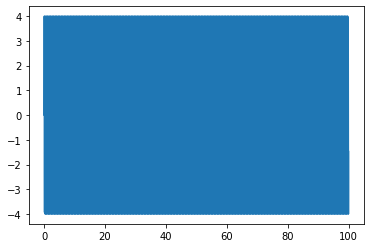

In [ ]:
import matplotlib.pyplot as plt
plt.plot(t, sig_sin)

Как видно, полученный график не репрезентативен, т.к. на нем мало что видно. 
Поэтому построим участок графика с использованием среза (slice), чтобы по изображению сигнала было возможно его анализировать:


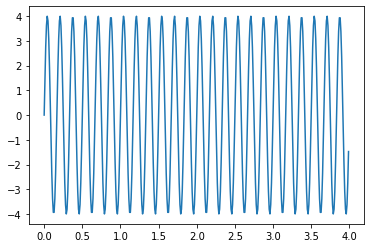

In [ ]:
plt.plot(t[0:400], sig_sin[0:400])

Кроме использования срезов, можно ограничить область видимости сигнала средствами matplotlib (`plt.ylim(yMin, yMax)` и `plt.xlim(xMin, xMax)`). 
Также добавим на график сетку и подписи осей:

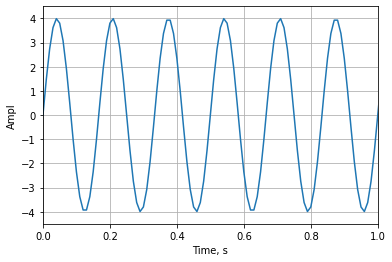

In [ ]:
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Ampl')
plt.ylim(-4.5, 4.5)
plt.xlim(0, 1)
plt.plot(t, sig_sin)

#### Построение спектра сигнала

Для построения спектра дискретных сигналов берется модуль от дискретного (быстрого) преобразования Фурье сигнала.

В Python для этого используется функция `np.fft.fft()` и `np.abs()` для вычисления спектра и получения амплитуды, соответственно.



In [ ]:
sig_sin_spec = np.abs(np.fft.fft(sig_sin))
print("Размерность массива спектра: {}".format(sig_sin_spec.shape))
print("Содержимое массива спектра: {}".format(sig_sin_spec))

Размерность массива спектра: (10000,)
Содержимое массива спектра: [2.94727586e-10 2.61506525e-10 3.48176490e-10 ... 2.05726636e-10
 3.48176490e-10 2.61506525e-10]


Следующим очевидным шагом является построение графика спектра. Попробуем сделать это наивным образом:

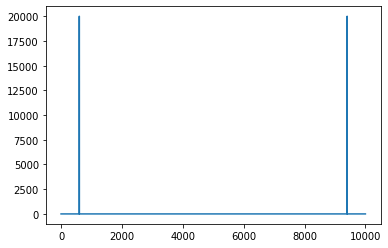

In [ ]:
plt.plot(sig_sin_spec)

Как видно, отсчеты спектра не соответствуют частотам. Для получения соответствий каналов ДПФ и их частот в NumPy используется команда `np.fft.fftfreq(<Размер вектора сигнала>, <Период дискретизации>)`:


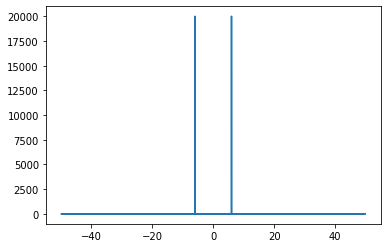

In [ ]:
freqs = np.fft.fftfreq(sig_sin.shape[0], dt)
plt.plot(freqs, sig_sin_spec)

Ограничим область видимости и подпишем оси:

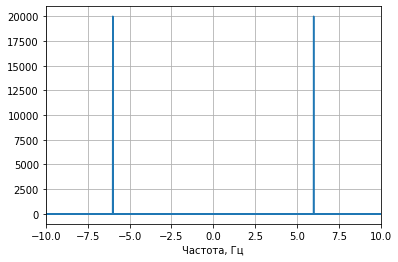

In [ ]:
plt.grid()
plt.xlabel('Частота, Гц')
plt.xlim(-10, 10)
plt.plot(freqs, sig_sin_spec)

Для того, чтобы графики располагались более компактно, можно использовать `plt.subplot`.

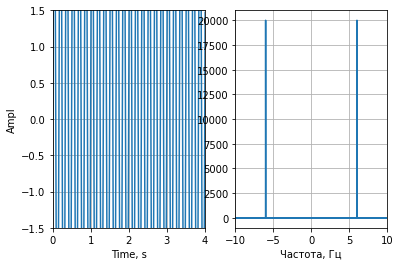

In [ ]:
plt.subplot(1, 2, 1)
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Ampl')
plt.ylim(-1.5, 1.5)
plt.xlim(0, 4)
plt.plot(t, sig_sin)

plt.subplot(1, 2, 2)
plt.grid()
plt.xlabel('Частота, Гц')
plt.xlim(-10, 10)
plt.plot(freqs, sig_sin_spec)

#### Прочие пробные сигналы

Для построения других пробных сигналов можно воспользоваться пакетом `signal` из библиотеки `scipy`:



In [ ]:
from scipy import signal

Пилообразный сигнал: [`signal.sawtooth`](https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.signal.sawtooth.html)

Меандр: [`signal.square`](https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.signal.square.html)

### Типовые нелинейные звенья

Рассмотрим типовые стационарные нелинейные звенья.

Для применения такого рода звена к сигналу не обязательно решать 
дифференциальное уравнение, т.к. выход зависит только от амплитуды и задачу 
можно решить умножением вектора сигнала на функцию нелинейности.

Для некоторых нелинейностей, например "идеальное реле" можно подобрать реализованную математическикую функцию ("знак"), для других необходимо реализовать таковую самостоятельно. NumPy в отличие от MatLab содержит функционал (`np.vectorize`) для создания векторизованых функций, что значительно повышает произволительность при работе с большими матрицами (длинными сигналами).

Векторизация позволяет создавать быстрые функции, содержащие сложную обработку элементов матрицы. Далее показан пример создания векторизованной функции для мертвой зоны и показан пример ее применения.

Функцию для нелинейности "насыщение" вам предлагается разработать самостоятельно.



#### Идеальное реле

In [ ]:
relay = np.sign

#### Мертвая зона

In [ ]:
def dead_zone_scalar(x, width = 0.5):
    if np.abs(x)<width:
        return 0
    elif x>0:
        return x-width
    else:
        return x+width
        
dead_zone = np.vectorize(dead_zone_scalar, otypes=[np.float], excluded=['width'])

Построем отклик нелинейного элемента "мертвая зона" на синусоиду. Для наглядности построим на одном графике входной и выходной сигналы

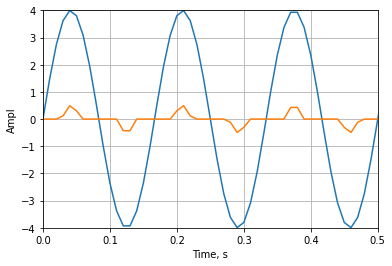

In [ ]:
sig_sin_dz = dead_zone(sig_sin, non_lin_param_1)
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Ampl')
plt.ylim(-4, 4)
plt.xlim(0, 0.5)
plt.plot(t, sig_sin, t, sig_sin_dz)

#### Насыщение

In [ ]:
def saturation_scalar(x, hight = 0.5):
    #Разработайте функцию самостоятельно
    pass

        
saturation = np.vectorize(saturation_scalar, otypes=[np.float], excluded=['hight'])

### Комбинация нелинейного и линейного звеньев

Последней частью работы является исследование последовательных соединений нелинейного и линейного звеньев.

В качестве линейного звена предлагатся апериодическое:

\begin{align}     
    H(S) = \frac{k}{1+TS} 
\end{align}

Для применения его в цифровом виде используем эквивалентный цифровой фильтр          
\begin{align}  
    x(i)= - A x(i-1) + B u(i)
\end{align}

где u(i) -- входное воздействие.

\begin{align} 
      A = \frac{1}{1 + T_д/T} \\
      B = \frac{k}{1 + T/T_д}
\end{align}

Такие фильры являются БИХ, для их применения в SciPy имеется функция `scipy.signal.lfilter`
     
Рассмотрим на примере синусоиды после звена "Мертвая зона" и построим все три сигнала на одном графике:

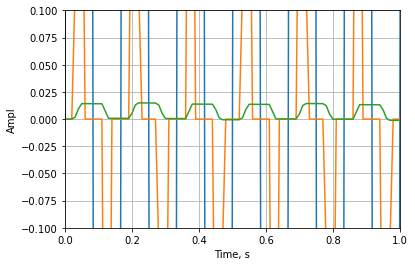

In [ ]:
k = lin_param_k
T = lin_param_T
B = [ k/(1+T/dt) ]
A = [1, -1/(1+dt/T)]
sig_sin_dz_lb = signal.lfilter(B, A, sig_sin_dz) # lb -- linear block

plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Ampl')
plt.ylim(-0.1, 0.1)
plt.xlim(0, 1)
plt.plot(t, sig_sin, t, sig_sin_dz, t, sig_sin_dz_lb)

**ВНИМАНИЕ**, не забывайте, что отчет по лабораторной работе является иллюстрированным текстом, а не картинками с комментариями.

## Контрольные вопросы

1. Нарисуйте статическую характеристику нелинейного звена.
2. Нарисуйте спектр сигнала
3. Постройте сигнал с предложенным спектром после прохождения линейного звена
4. Опишите назначение команд(ы) в исходном коде
5. Нарисуйте отклик нелинейности на предложенный сигнал
6. Нарисуйте отклик предложенной нелинейности (статическая характеристика) на синусоиду или линейно-возрастающее воздействие.
